## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [2]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
X = boston.drop(columns=['medv']).copy()
y = boston[['medv']]

In [3]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [4]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [22]:
# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo de árvore de decisão para regressão
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Fazendo previsões no conjunto de treinamento
y_train_pred = regressor.predict(X_train)

# Avaliando o desempenho no conjunto de treinamento
mse_train = mean_squared_error(y_train, y_train_pred)
print(f'Mean Squared Error on Training Set: {mse_train}')





Mean Squared Error on Training Set: 0.0


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [7]:
# Escolha uma amostra do conjunto de teste (altere o índice conforme necessário)
sample_index = 0
sample = X_test.iloc[[sample_index]]
sample_actual_value = y_test.iloc[sample_index]

# Obtenha o caminho da amostra pela árvore
decision_path = regressor.decision_path(sample)

# Encontre os nós ativos no caminho
active_nodes = decision_path.indices

# Imprima os recursos e valores de divisão nos nós ativos
for node in active_nodes:
    feature_index = regressor.tree_.feature[node]
    threshold = regressor.tree_.threshold[node]
    value = sample.iloc[0, feature_index]

    if value <= threshold:
        decision = 'left'
    else:
        decision = 'right'

    print(f"Node {node}: {X.columns[feature_index]} <= {threshold} ({decision})")

# Faça uma previsão usando a árvore para a amostra
predicted_value = regressor.predict(sample)

# Imprima o valor real e a previsão
print(f"Actual Value: {sample_actual_value.values[0]}")
print(f"Predicted Value: {predicted_value[0]}")


Node 0: rm <= 6.940999984741211 (left)
Node 1: lstat <= 14.400000095367432 (left)
Node 2: dis <= 1.3848499655723572 (right)
Node 6: rm <= 6.542999982833862 (left)
Node 7: rm <= 6.09850001335144 (right)
Node 147: tax <= 222.5 (right)
Node 153: lstat <= 9.980000019073486 (left)
Node 154: crim <= 0.05221499875187874 (right)
Node 190: lstat <= 8.625 (right)
Node 240: crim <= 0.15245500206947327 (left)
Node 241: b <= 384.7099914550781 (right)
Node 243: b <= -2.0 (right)
Actual Value: 23.6
Predicted Value: 28.1


### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [8]:
# Lista para armazenar as árvores treinadas
trees_list = []

# Lista de valores de alpha que você deseja testar (ajuste conforme necessário)
alpha_values = [0.0, 0.01, 0.1, 0.5, 1.0]

# Iteração sobre os valores de alpha
for alpha in alpha_values:
    # Criando e treinando a árvore com o valor específico de alpha
    regressor = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
    regressor.fit(X_train, y_train)
    
    # Armazenando a árvore na lista
    trees_list.append(regressor)

    # Avaliando o desempenho da árvore no conjunto de treinamento
    y_train_pred = regressor.predict(X_train)
    mse_train = mean_squared_error(y_train, y_train_pred)
    print(f'Mean Squared Error on Training Set for alpha={alpha}: {mse_train}')

# Agora, a lista "trees_list" contém as árvores treinadas para diferentes valores de alpha.



Mean Squared Error on Training Set for alpha=0.0: 0.0
Mean Squared Error on Training Set for alpha=0.01: 0.3851300388967468
Mean Squared Error on Training Set for alpha=0.1: 3.8215918292624678
Mean Squared Error on Training Set for alpha=0.5: 9.526024282673657
Mean Squared Error on Training Set for alpha=1.0: 13.030929860103207


### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [9]:
# Iterando sobre as árvores na lista
for i, tree in enumerate(trees_list):
    # Fazendo previsões no conjunto de treinamento usando a árvore atual
    y_train_pred = tree.predict(X_train)

    # Calculando o MSE para a árvore atual
    mse_train = mean_squared_error(y_train, y_train_pred)

    # Imprimindo o MSE para a árvore atual
    print(f'Mean Squared Error for Tree {i + 1}: {mse_train}')



Mean Squared Error for Tree 1: 0.0
Mean Squared Error for Tree 2: 0.3851300388967468
Mean Squared Error for Tree 3: 3.8215918292624678
Mean Squared Error for Tree 4: 9.526024282673657
Mean Squared Error for Tree 5: 13.030929860103207


### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

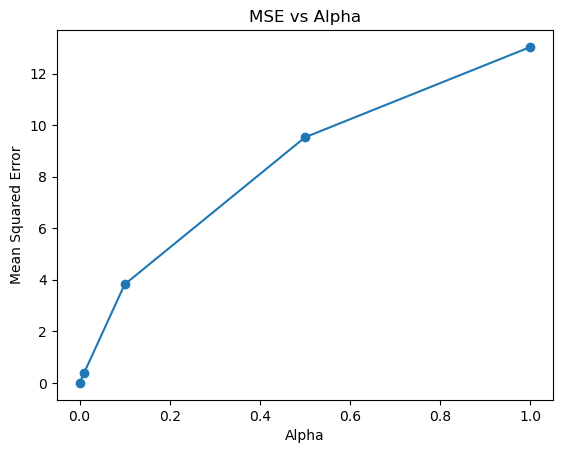

Optimal Alpha: 0.0


In [10]:
# Listas para armazenar os valores de alpha e os MSE correspondentes
alpha_values = [0.0, 0.01, 0.1, 0.5, 1.0]
mse_values = []

# Iteração sobre os valores de alpha
for alpha in alpha_values:
    # Criando e treinando a árvore com o valor específico de alpha
    regressor = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
    regressor.fit(X_train, y_train)
    
    # Fazendo previsões no conjunto de treinamento
    y_train_pred = regressor.predict(X_train)
    
    # Calculando o MSE para a árvore atual
    mse_train = mean_squared_error(y_train, y_train_pred)
    
    # Armazenando o MSE na lista
    mse_values.append(mse_train)

# Montando o gráfico MSE por alpha
plt.plot(alpha_values, mse_values, marker='o')
plt.title('MSE vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.show()

# Escolhendo o valor de alpha próximo ao ponto de mínimo do MSE
optimal_alpha = alpha_values[np.argmin(mse_values)]
print(f'Optimal Alpha: {optimal_alpha}')


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [11]:
# Criando e treinando a árvore com o valor de alpha escolhido
regressor_optimal = DecisionTreeRegressor(random_state=42, ccp_alpha=optimal_alpha)
regressor_optimal.fit(X_train, y_train)

# Fazendo previsões no conjunto de treinamento
y_train_pred_optimal = regressor_optimal.predict(X_train)

# Calculando o R-quadrado para a árvore com alpha escolhido
r2_score_optimal = regressor_optimal.score(X_train, y_train)

print(f'R-squared for the Tree with Optimal Alpha: {r2_score_optimal}')



R-squared for the Tree with Optimal Alpha: 1.0


### 7. Visualize esta árvore.

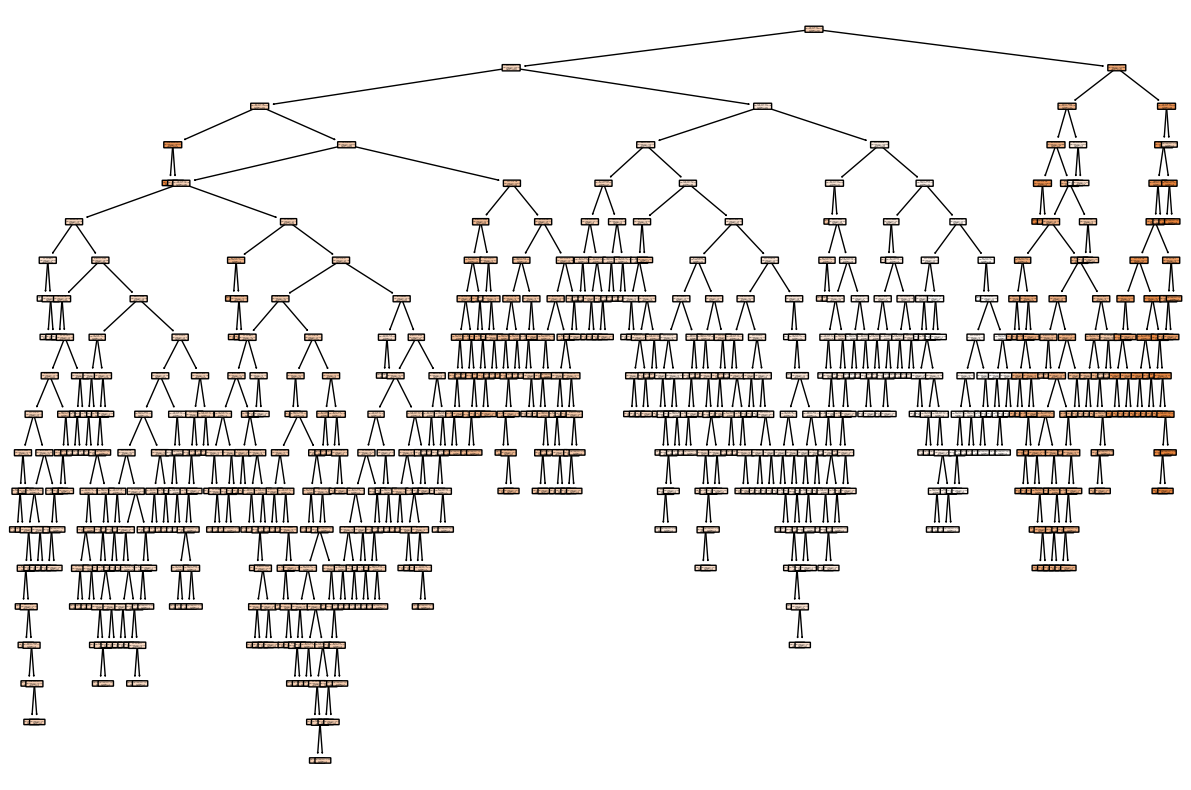

In [21]:
# Importar a biblioteca plot_tree
from sklearn.tree import plot_tree

# Visualizando a árvore de decisão com o valor de alpha escolhido
plt.figure(figsize=(15, 10))
plot_tree(regressor_optimal, filled=True, feature_names=X.columns.tolist(), rounded=True)
plt.show()






 
